In [1]:
COLAB = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -la


total 20
drwxr-xr-x 1 root root 4096 Jul 13 15:47 .
drwxr-xr-x 1 root root 4096 Jul 13 15:46 ..
drwxr-xr-x 4 root root 4096 Jul  6 13:21 .config
drwx------ 5 root root 4096 Jul 13 15:47 drive
drwxr-xr-x 1 root root 4096 Jul  6 13:22 sample_data


###IMPORTING LIBRARIES

In [4]:
!pip install sumy #Simple library and command line utility for extracting summary from HTML pages or plain texts.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 10.1 MB 34.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=d388978cf2b594fa6db3a60cff47d2f072f0a5785b400fdf02a4cda763a7361a
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=569ac9904304f3254af4b98077ace3e19f8096fb39d0ce1af62790e8e795de96
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built breadability pycountry


In [5]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image #for image edition, pillow library
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer #Latent Semantic Analysis is based on Singular value decomposition(SVD). 
                                               #It reduces the data into a lower-dimensional space. 
                                               #It performs spatial decomposition and captures information in a singular vector and the magnitude of so singular vector will represent the importance.
                                               #LSA has the capability to extract semantically related sentences but its computation is complex.
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#NLP Sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer


### Textual Data Exploration

In [6]:
# Van Halen 1984 album

album_folder = "/content/drive/MyDrive/1984-NLP/Data/1984 album Van Halen"

songs= os.listdir(album_folder) #list all the lyrics inside this album

songs

['Drop Dead Legs.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 "I'll Wait.txt",
 'Jump.txt',
 'Panama.txt',
 'Top Jimmy.txt']

In [7]:
# let's create a corpus from the lyrics of the album (a python list)

album_corpus = []
route = album_folder+'/'
for lyrics in songs:
  with open(route+lyrics, encoding= 'utf8') as f_input: 
    album_corpus.append(f_input.read())

In [8]:
album_corpus

["Drop dead legs, pretty smile\nHurts my head, gets me wild\nDig that steam\nGiant butt\nMakes me scream\nI get nothing, nothing but the shakes over you\nAnd nothing else could ever do\n\n[Chorus:]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?\n\nDig those moves, vampire\nSet me loose, get it higher\nThrow my rope, loop-de-loop\nNice white teeth, Betty Boop\nSet it cool, real heavy\nI ain't fooled, gettin' ready\nOooh, aw baby\n\n[Chorus]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?",
 "[Verse 1]\nAh lazy eyes in the summer heat\nFresh from outta town\nNow she's working on the street\nShakin' poor boys down\n\n[Chorus]\nUh (girl) uh girl gone bad\n(Girl) girl gone bad\n\n[Verse 2]\nFound that girl with a lonesome John\nBut she should've been with me\nGuess that woman fallen in love\nShe don't work for fr

In [9]:
# Since now we already have the corpus, we can already make some analysis on

In [10]:
album_word_list = [] #iterate over all the words in the corpus

#lyrics is each sentence
for lyrics in album_corpus:
  for word in lyrics.split():
    album_word_list.append(word)

album_word_list
   


['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'my',
 'head,',
 'gets',
 'me',
 'wild',
 'Dig',
 'that',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'me',
 'scream',
 'I',
 'get',
 'nothing,',
 'nothing',
 'but',
 'the',
 'shakes',
 'over',
 'you',
 'And',
 'nothing',
 'else',
 'could',
 'ever',
 'do',
 '[Chorus:]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it,',
 'baby',
 'When',
 'the',
 'night',
 'is',
 'through,',
 'will',
 'I',
 'still',
 'be',
 'loving',
 'you?',
 'Dig',
 'those',
 'moves,',
 'vampire',
 'Set',
 'me',
 'loose,',
 'get',
 'it',
 'higher',
 'Throw',
 'my',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'it',
 'cool,',
 'real',
 'heavy',
 'I',
 "ain't",
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'kno

In [11]:
len(album_word_list)

1398

In [12]:
album_word_count_unique = Counter(album_word_list)
len(album_word_count_unique)

493

In [13]:
# George Orwell 1984 novel, now we do the same process but this time with the novel

In [14]:
novel = "/content/drive/MyDrive/1984-NLP/Data/1984-novel-George Orwell.txt"

novel_corpus = []

with open(novel, encoding = 'utf8') as f_input:
  novel_corpus.append(f_input.read())


In [15]:
novel_corpus

['Title:      Nineteen eighty-four\nAuthor:     George Orwell (pseudonym of Eric Blair) (1903-1950)\n\n\n\n\nPART ONE\n\n\n\nChapter 1\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin prepara

In [16]:
novel_word_list = novel_corpus[0].split() #list of just the firt element

In [17]:
novel_word_list 

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [18]:
len(novel_word_list)

103377

In [19]:
len(Counter(novel_word_list)) #create a list with all the single words in the novel

15530

###WORD CLOUDS

In [20]:
#First of all we need to remove word that we really don't need (stopwords, e.g.)

stopwords = list(get_stop_words("english"))

In [21]:
stopwords

['everybody',
 'latter',
 'anywhere',
 'z',
 'until',
 'theirs',
 'uucp',
 'yourselves',
 'thats',
 'become',
 'yes',
 'cannot',
 'the',
 'otherwise',
 'hi',
 'neither',
 'towards',
 'for',
 'lately',
 "it'd",
 'over',
 'hither',
 'everything',
 'on',
 'he',
 'etc',
 'at',
 "it's",
 'into',
 'our',
 'hence',
 'however',
 "don't",
 "they'll",
 'eg',
 'looks',
 'k',
 'considering',
 'various',
 'new',
 'of',
 'seems',
 "here's",
 'specifying',
 'nor',
 'anything',
 'getting',
 'when',
 'appropriate',
 'like',
 'thence',
 'tries',
 "she'd",
 'then',
 "you're",
 'after',
 'usually',
 'seem',
 "let's",
 'cause',
 "hadn't",
 'despite',
 'hereafter',
 'yourself',
 'help',
 'overall',
 'against',
 'ie',
 'been',
 'probably',
 'under',
 'whereby',
 'value',
 'causes',
 'f',
 'anyway',
 'perhaps',
 'nearly',
 'thru',
 'whenever',
 'followed',
 'each',
 'likely',
 'done',
 'course',
 'especially',
 'everywhere',
 'looking',
 'unless',
 'thus',
 'thorough',
 'whereafter',
 'accordingly',
 'sent',


In [22]:
clean_album_word_list = []

for word in album_word_list:
  if word not in stopwords:
    clean_album_word_list.append(word)

In [23]:
clean_album_word_list

['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'head,',
 'wild',
 'Dig',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'scream',
 'I',
 'nothing,',
 'shakes',
 'And',
 '[Chorus:]',
 'You',
 'I',
 'You',
 'it,',
 'baby',
 'When',
 'night',
 'through,',
 'I',
 'loving',
 'you?',
 'Dig',
 'moves,',
 'vampire',
 'Set',
 'loose,',
 'higher',
 'Throw',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'cool,',
 'real',
 'heavy',
 'I',
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'I',
 'You',
 'it,',
 'baby',
 'When',
 'night',
 'through,',
 'I',
 'loving',
 'you?',
 '[Verse',
 '1]',
 'Ah',
 'lazy',
 'eyes',
 'summer',
 'heat',
 'Fresh',
 'outta',
 'town',
 'Now',
 'working',
 'street',
 "Shakin'",
 'poor',
 'boys',
 '[Chorus]',
 'Uh',
 '(girl)',
 'uh',
 'girl',
 'bad',
 '(Girl)',
 'girl',
 'bad',
 '[Verse',
 '2]',
 'Found',
 'girl',
 'lonesome',
 'John',
 'But',
 "should've",
 'Guess',
 'woman',
 'fallen',
 'love'

In [24]:
#let's find out the frequency of these words

import nltk

frequency_of_clean_album_words = nltk.FreqDist(clean_album_word_list) #similar to the Counter that we used before

In [25]:
frequency_of_clean_album_words

FreqDist({'"Class': 2,
          '"Hey,': 2,
          '"I': 4,
          '"My': 2,
          '"Oh': 4,
          '"Wait': 2,
          "'Cause": 1,
          '("I\'m': 2,
          '("What': 2,
          '(Girl)': 2,
          '(Jump!)': 6,
          '(girl)': 1,
          '(guitar': 1,
          '(oh': 1,
          '(ow,': 1,
          '(say,': 1,
          '(yeah,': 1,
          '1]': 6,
          '2]': 6,
          'Ah': 2,
          'Ah,': 2,
          "Ain't": 1,
          'And': 6,
          'Baby,': 1,
          'Betty': 1,
          'Boop': 1,
          'But': 7,
          'Cherry': 2,
          'Dig': 2,
          "Don't": 4,
          'Driving': 1,
          'Drop': 1,
          'Ease': 1,
          'Found': 1,
          'Fresh': 1,
          'Get': 1,
          'Giant': 1,
          'Gimme': 2,
          'Girl': 6,
          'Go': 6,
          'God!': 2,
          'Gonna': 2,
          'Got': 2,
          'Guess': 1,
          "He's": 1,
          "Heartache's": 1,
        

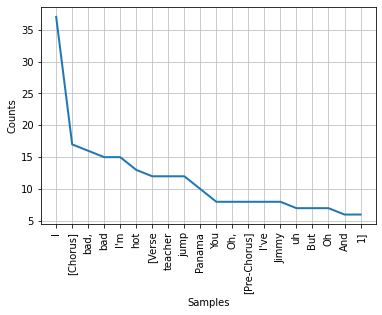

In [26]:
#let's plot this and see how it looks like

frequency_of_clean_album_words.plot(20, cumulative = False)

In [27]:
#Plotting the word cloud
count_clean_album_word_list = Counter(clean_album_word_list) #it returns a list with frequencies

count_clean_album_word_list

Counter({'"Class': 2,
         '"Hey,': 2,
         '"I': 4,
         '"My': 2,
         '"Oh': 4,
         '"Wait': 2,
         "'Cause": 1,
         '("I\'m': 2,
         '("What': 2,
         '(Girl)': 2,
         '(Jump!)': 6,
         '(girl)': 1,
         '(guitar': 1,
         '(oh': 1,
         '(ow,': 1,
         '(say,': 1,
         '(yeah,': 1,
         '1]': 6,
         '2]': 6,
         'Ah': 2,
         'Ah,': 2,
         "Ain't": 1,
         'And': 6,
         'Baby,': 1,
         'Betty': 1,
         'Boop': 1,
         'But': 7,
         'Cherry': 2,
         'Dig': 2,
         "Don't": 4,
         'Driving': 1,
         'Drop': 1,
         'Ease': 1,
         'Found': 1,
         'Fresh': 1,
         'Get': 1,
         'Giant': 1,
         'Gimme': 2,
         'Girl': 6,
         'Go': 6,
         'God!': 2,
         'Gonna': 2,
         'Got': 2,
         'Guess': 1,
         "He's": 1,
         "Heartache's": 1,
         'Hell,': 2,
         'Here': 1,
         'Hey

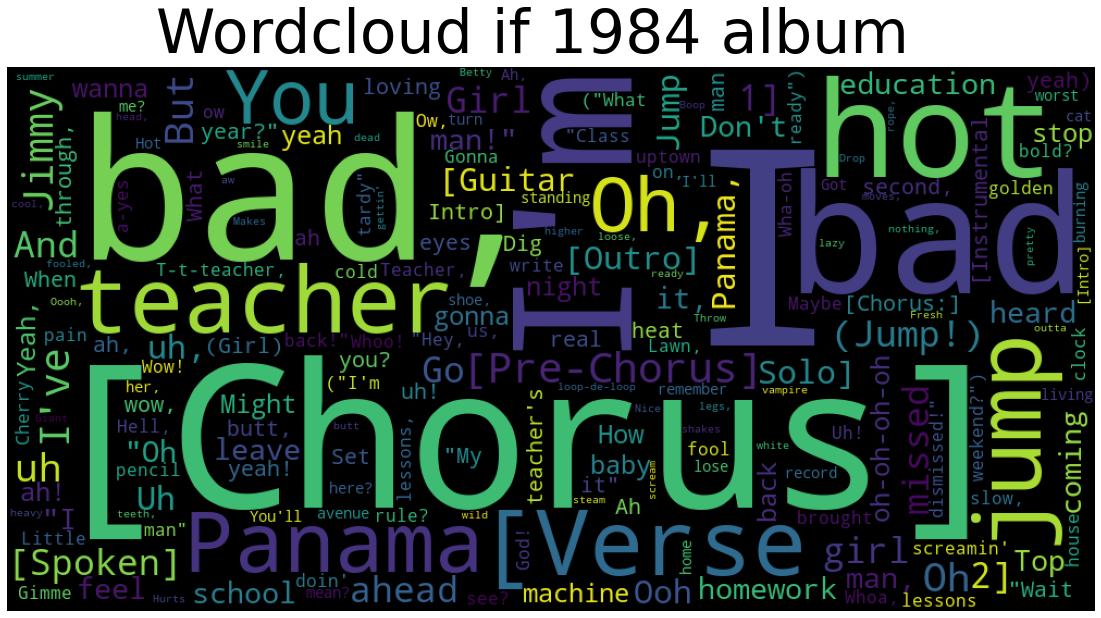

In [28]:
wordcloud_1984_album = WordCloud(width=1000, height=500).generate_from_frequencies(count_clean_album_word_list)
plt.figure(figsize=(20,10))
plt.figtext(.5,.9, "Wordcloud if 1984 album", fontsize=60, ha= 'center')
plt.imshow(wordcloud_1984_album)
plt.axis("off")
plt.show()

In [29]:
#same process for novel words

clean_novel_word_list = []

for word in novel_word_list:
  if word not in stopwords:
    clean_novel_word_list.append(word)
    

In [30]:
clean_novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'bright',
 'cold',
 'day',
 'April,',
 'clocks',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'chin',
 'nuzzled',
 'breast',
 'effort',
 'escape',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'glass',
 'doors',
 'Victory',
 'Mansions,',
 'quickly',
 'prevent',
 'swirl',
 'gritty',
 'dust',
 'entering',
 'him.',
 'The',
 'hallway',
 'smelt',
 'boiled',
 'cabbage',
 'rag',
 'mats.',
 'At',
 'end',
 'coloured',
 'poster,',
 'large',
 'indoor',
 'display,',
 'tacked',
 'wall.',
 'It',
 'depicted',
 'simply',
 'enormous',
 'face,',
 'metre',
 'wide:',
 'face',
 'man',
 'forty-five,',
 'heavy',
 'black',
 'moustache',
 'ruggedly',
 'handsome',
 'features.',
 'Winston',
 'made',
 'stairs.',
 'It',
 'lift.',
 'Even',
 'times',
 'seldom',
 'working,',
 'present',
 'electric',
 'current',
 'cut',
 'daylight',
 'hours.',
 'It'

In [31]:
frequency_of_clean_novel_word_list = nltk.FreqDist(clean_novel_word_list)

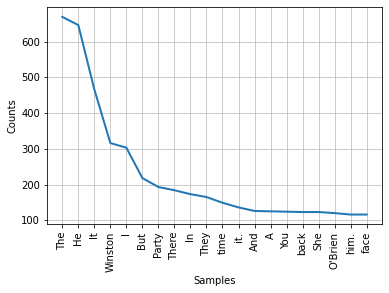

In [32]:
frequency_of_clean_novel_word_list.plot(20, cumulative=False)

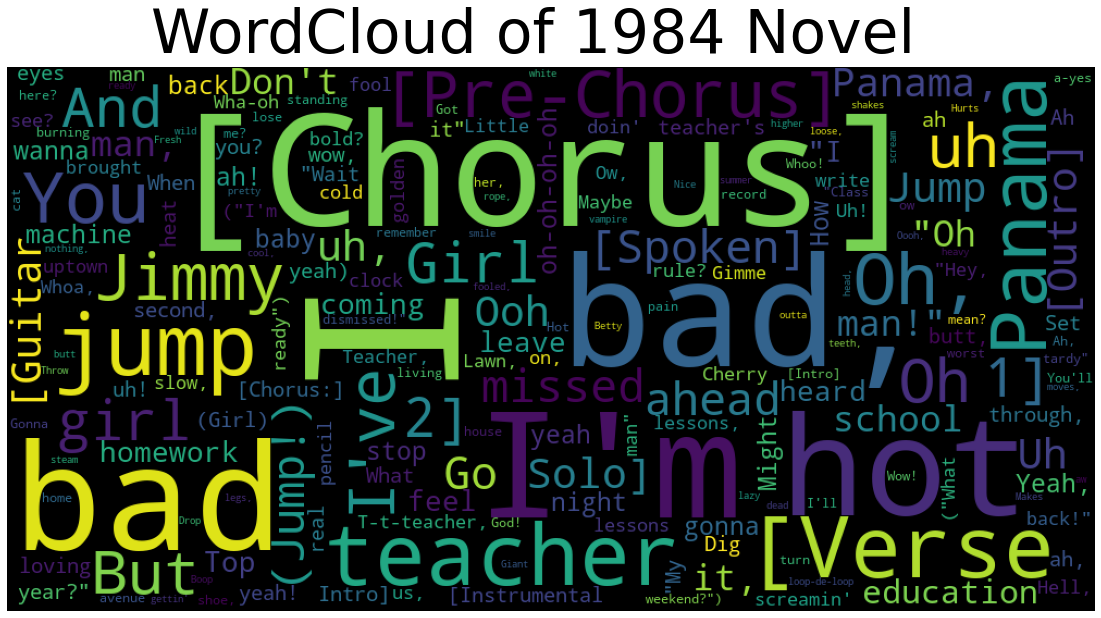

In [33]:
word_cloud_novel_word_list = Counter(clean_album_word_list)
word_cloud_1984_novel = WordCloud(width=1000, height=500).generate_from_frequencies(word_cloud_novel_word_list)

plt.figure(figsize= (20,10))
plt.figtext(.5,.9, "WordCloud of 1984 Novel", fontsize= 60, ha= 'center')
plt.imshow(word_cloud_1984_novel)
plt.axis("off")
plt.show()

### NLP SUMMARIZATION

In [34]:
nltk.download('punkt') #puntkt is a tokenizer that we need for summarizing

"""This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences.  It must be
trained on a large collection of plaintext in the target language
before it can be used.

The NLTK data package includes a pre-trained Punkt tokenizer for
English."""

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'This tokenizer divides a text into a list of sentences\nby using an unsupervised algorithm to build a model for abbreviation\nwords, collocations, and words that start sentences.  It must be\ntrained on a large collection of plaintext in the target language\nbefore it can be used.\n\nThe NLTK data package includes a pre-trained Punkt tokenizer for\nEnglish.'

In [35]:
lsa = LsaSummarizer(Stemmer('english')) #extracting and representing meanings behind words
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(album_corpus), Tokenizer('english'))
lsa_summary = lsa(parser.document,10)

In [36]:
lsa_summary

(<Sentence: Drop dead legs, pretty smile Hurts my head, gets me wild Dig that steam Giant butt Makes me scream I get nothing, nothing but the shakes over you And nothing else could ever do>,
 <Sentence: Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby>,
 <Sentence: [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down>,
 <Sentence: [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free>,
 <Sentence: [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again?>,
 <Sentence: Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline>,
 <Sentence: [Verse 2] Ain't nothin' li

In [37]:
#let's put the summary in a list
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
summary_album = " ".join(lsa_summary_list) #it joins the sentences leaving a space between each sentence (" ")
print("Summary of 1984 album")
summary_album

Summary of 1984 album


"Drop dead legs, pretty smile Hurts my head, gets me wild Dig that steam Giant butt Makes me scream I get nothing, nothing but the shakes over you And nothing else could ever do Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again? Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burn

In [38]:
#We can do exactly the same with the novel

In [39]:
parser_novel = PlaintextParser.from_string(' '.join(novel_corpus), Tokenizer('english'))
lsa_summary_novel = lsa(parser_novel.document,20)
lsa_summary_novel_list = [str(sentence) for sentence in lsa_summary_novel]
summary_novel = " ".join(lsa_summary_novel_list) #it joins the sentences leaving a space between each sentence (" ")
print("Summary of 1984 novel")
summary_novel

/usr/local/lib/python3.7/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5813) is lower than number of sentences (6827). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


Summary of 1984 novel


"When one knew that any document was due for destruction, or even when one saw a scrap of waste paper lying about, it was an automatic action to lift the flap of the nearest memory hole and drop it in, whereupon it would be whirled away on a current of warm air to the enormous furnaces which were hidden somewhere in the recesses of the building. And a few cubicles away a mild, ineffectual, dreamy creature named Ampleforth, with very hairy ears and a surprising talent for juggling with rhymes and metres, was engaged in producing garbled versions--definitive texts, they were called--of poems which had become ideologically offensive, but which for one reason or another were to be retained in the anthologies. And the Records Department, after all, was itself only a single branch of the Ministry of Truth, whose primary job was not to reconstruct the past but to supply the citizens of Oceania with newspapers, films, textbooks, telescreen programmes, plays, novels--with every conceivable kind

### NLP Sentiment Analysis

In [40]:
#album sentiment analysis
nltk.download('vader_lexicon') #pretrained sentiment analyzer

sentiment_analyzer = SentimentIntensityAnalyzer()
print("Sentiment Analysis of 1984 Album")
print(sentiment_analyzer.polarity_scores(" ".join(album_corpus)))

Sentiment Analysis of 1984 Album
{'neg': 0.155, 'neu': 0.713, 'pos': 0.133, 'compound': -0.9953}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [41]:
#novel sentiment analysis

print("Sentiment Analysis of 1984 Novel")
print(sentiment_analyzer.polarity_scores(" ".join(novel_corpus)))

Sentiment Analysis of 1984 Novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}


sources:

https://avinashnavlani.medium.com/text-summarization-using-python-773e064377eb